## Plot Visualization of Demonstration Positions

In [1]:
import os
import sys
import json

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend_handler import HandlerPatch
from matplotlib.patches import PathPatch

# get the current script's directory
current_directory = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
# get the parent directory
parent_directory = os.path.dirname(current_directory)
# add the parent directory to the sys.path
sys.path.append(parent_directory)

from utils import common

In [2]:
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
grand_parent_path = os.path.dirname(parent_path)

In [3]:
dataset_path = os.path.join(grand_parent_path, "dataset")
demo_path = os.path.join(dataset_path, "human_demonstrations")

In [4]:
date = "2024_01_23" # year_month_day

In [5]:
object_position = [-0.163, 0.920, 0.554] # x, y, z

In [6]:
ros_topics = ["distance_to_object", "distance_to_target", "distance_to_start", "distance_to_ground", "arm_action", "arm_state"]

In [7]:
dataset_folder = os.path.join(demo_path, date)

In [8]:
json_files = os.listdir(dataset_folder + "\\jsons")

# Functions

In [9]:
def plot_trajectory(ax,
                    trajectory,
                    color,
                    traj_s,
                    start_s,
                    end_s,
                    label):
    
    timestamps = [entry[4]["timestamp"] for entry in trajectory if not len(entry) < 5]
    positions = [entry[4]["message"]["position"] for entry in trajectory if not len(entry) < 5]

    start_index = timestamps.index(min(timestamps))
    end_index = timestamps.index(max(timestamps))

    x = [position["x"] for position in positions]
    y = [position["y"] for position in positions]
    z = [position["z"] for position in positions]

    scatter_traj = ax.scatter(x, y, z,
                              c=color, marker="o", s=traj_s, label=label)

    scatter_start = ax.scatter(x[start_index], y[start_index], z[start_index],
                               c="green", marker="*", s=start_s, label="Start Position")
    scatter_end = ax.scatter(x[end_index], y[end_index], z[end_index],
                             c="blue", marker="X", s=end_s, label="End Position")
    
    scatter_object = ax.scatter(object_position[0], object_position[1], object_position[2],
                                c="red", marker="s", s=80, label="Obstacle")

In [10]:
def visualize_trajectories(data_list):
    
    num_traj = len(data_list)
    
    %matplotlib notebook
    
    fig = plt.figure()
    ax = fig.add_subplot(111,
                         projection="3d")

    for i, trajectory in enumerate(data_list):
        
        # generate a color based on trajectory index
        color = plt.cm.cividis(i / num_traj)
        label = f"Trajectory {i + 1}"
        
        plot_trajectory(ax=ax,
                        trajectory=trajectory,
                        color=color,
                        traj_s=1,
                        start_s=40,
                        end_s=30,
                        label=label)

    ax.set_xlabel("X Position [m]")
    ax.set_ylabel("Y Position [m]")
    ax.set_zlabel("Z Position [m]")
    ax.set_title("End-Effector 3D Positions Over Time")
    
    # add colorbar
    norm = plt.Normalize(0,
                         num_traj)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis,
                               norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm,
                        ax=ax,
                        shrink=0.4,
                        orientation="vertical",
                        pad=0.15,
                        label="Trajectory Index")

    legend_entries = ["Trajectory", "Start Position", "End Position", "Obstacle"]
    legend_colors = ["black", "green", "blue", "red"]
    
    legend = ax.legend(legend_entries,
                       loc="upper left",
                       bbox_to_anchor=(1, 1))
    for i, text in enumerate(legend.get_texts()):
        text.set_color(legend_colors[i])

    plt.show()

In [11]:
def plot_state(axs,
               colors,
               trajectory):
    
    timestamps = [int(entry[0]["timestamp"]) for entry in trajectory if not len(entry) < 5]
    start_time = min(timestamps)
    # convert nanoseconds to seconds
    time_seconds = [(t - start_time) / 1e9 for t in timestamps]
    
    distance_to_object = [entry[0]["message"] for entry in trajectory if not len(entry) < 5]
    distance_to_target = [entry[1]["message"] for entry in trajectory if not len(entry) < 5]
    distance_to_start = [entry[2]["message"] for entry in trajectory if not len(entry) < 5]
    distance_to_ground = [entry[3]["message"] for entry in trajectory if not len(entry) < 5]
    
    if len(axs) == 1:
        axs[0].plot(time_seconds, distance_to_start,
                    color=colors[0],
                    label="Distance to Start")
        axs[0].plot(time_seconds, distance_to_target,
                    color=colors[1],
                    label="Distance to Target")
        axs[0].plot(time_seconds, distance_to_object,
                    color=colors[2],
                    label="Distance to Obstacle")
        axs[0].plot(time_seconds, distance_to_ground,
                    color=colors[3],
                    label="Distance to Ground")
    
    else:
        axs[0].plot(time_seconds, distance_to_start,
                    color=colors[0])
        axs[0].set_title("Distance to Start")
        axs[1].plot(time_seconds, distance_to_target,
                    color=colors[1])
        axs[1].set_title("Distance to Target")
        axs[2].plot(time_seconds, distance_to_object,
                    color=colors[2])
        axs[2].set_title("Distance to Obstacle")
        axs[3].plot(time_seconds, distance_to_ground,
                    color=colors[3])
        axs[3].set_title("Distance to Ground")

In [12]:
def visualize_states(data_list):
    
    num_traj = len(data_list)
    
    fig, axes = plt.subplots(2, 2)
    
    for i, trajectory in enumerate(data_list):
        
        colors = [plt.cm.viridis(i / num_traj),
                  plt.cm.ocean(i / num_traj),
                  plt.cm.inferno(i / num_traj),
                  plt.cm.cividis(i / num_traj)]
        
        plot_state(axs=[axes[0, 0], axes[1, 0], axes[0, 1], axes[1, 1]],
                   colors=colors,
                   trajectory=trajectory)
        
    plt.show()

# Test

In [13]:
json_path = os.path.join(dataset_folder + "\\jsons", json_files[0])

In [14]:
data = common.read_json(json_path)

<IPython.core.display.Javascript object>


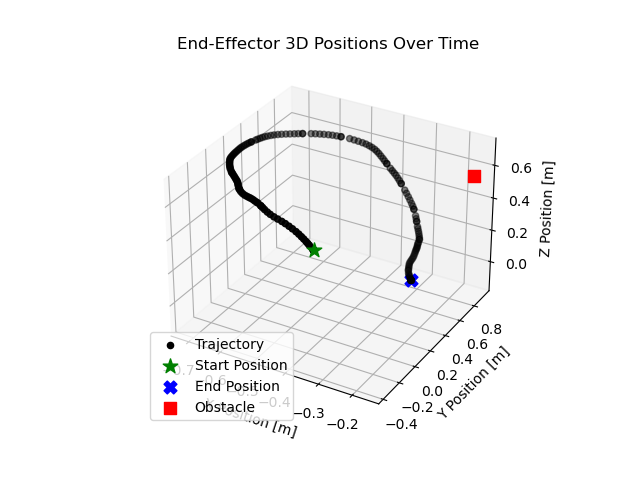

In [15]:
# enable interactive plots in Jupyter Notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111,
                     projection="3d")

plot_trajectory(ax=ax,
                trajectory=data,
                color="black",
                traj_s=20,
                start_s=120,
                end_s=85,
                label="Trajectory")

ax.set_xlabel("X Position [m]")
ax.set_ylabel("Y Position [m]")
ax.set_zlabel("Z Position [m]")
ax.set_title("End-Effector 3D Positions Over Time")

ax.legend()

plt.show()

<IPython.core.display.Javascript object>


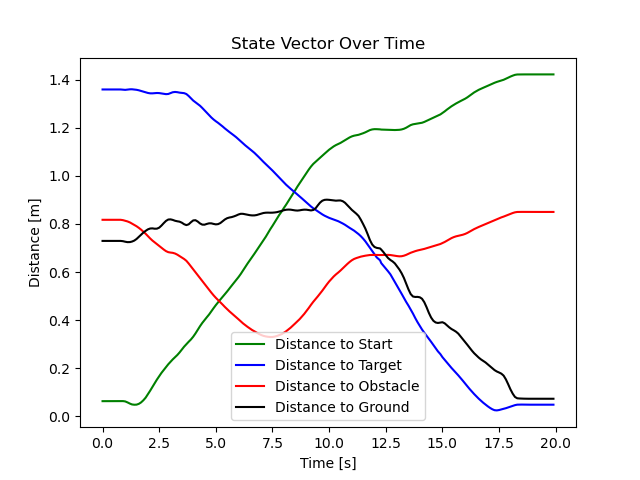

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

plot_state(axs=[ax],
           colors=["green", "blue", "red", "black"],
           trajectory=data)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Distance [m]")
ax.set_title("State Vector Over Time")

ax.legend()

plt.show()

# Run Through All Files

In [17]:
data_list = []

for file in json_files:

    json_path = os.path.join(dataset_folder + "\\jsons", file)
    
    data = common.read_json(json_path)
    data_list.append(data)

<IPython.core.display.Javascript object>


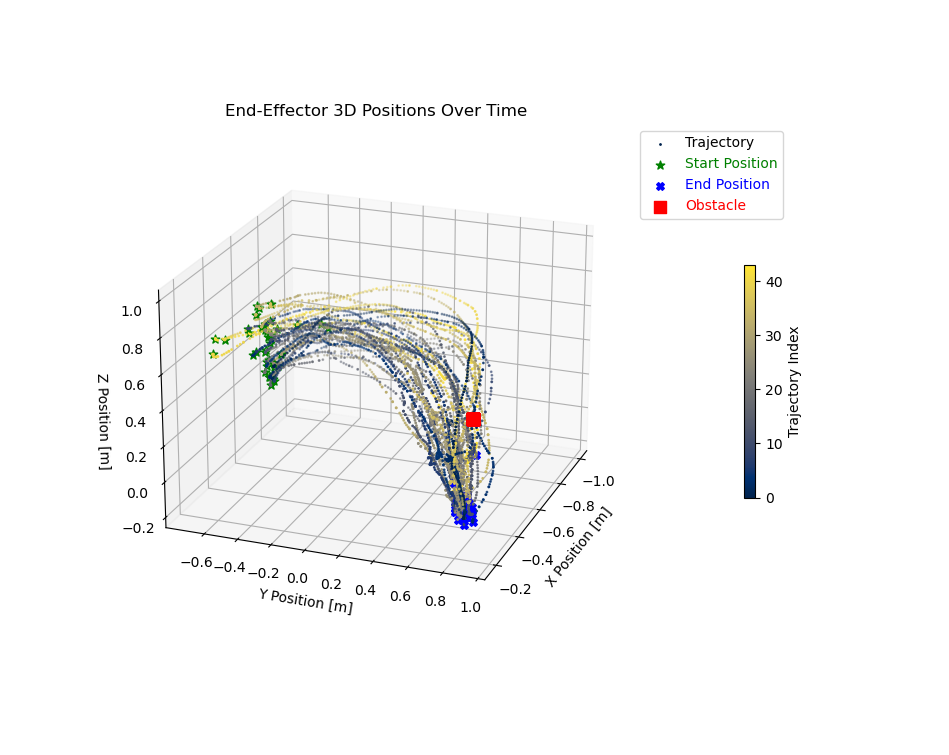

C:\Users\24989903\AppData\Local\Temp\ipykernel_22196\2300788724.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter_traj = ax.scatter(x, y, z,


In [18]:
visualize_trajectories(data_list=data_list)

<IPython.core.display.Javascript object>


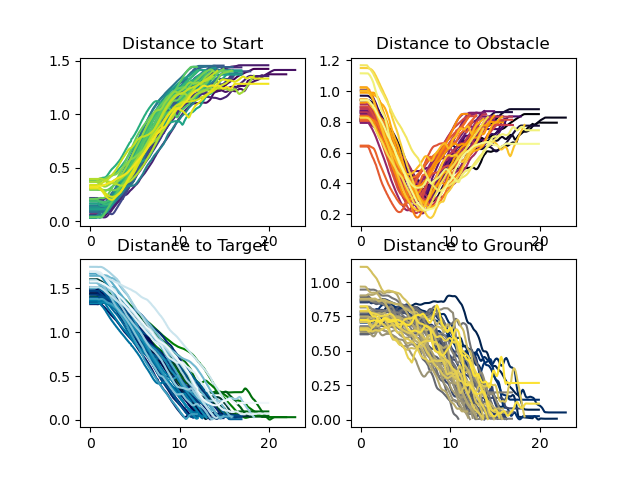

In [19]:
visualize_states(data_list=data_list)